  6.363987 seconds (370.86 k allocations: 37.095 MiB, 0.89% gc time, 3.28% compilation time)


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0020\tmp.gif
└ @ Plots D:\.julia\packages\Plots\Di0Qb\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0020\\tmp.gif")
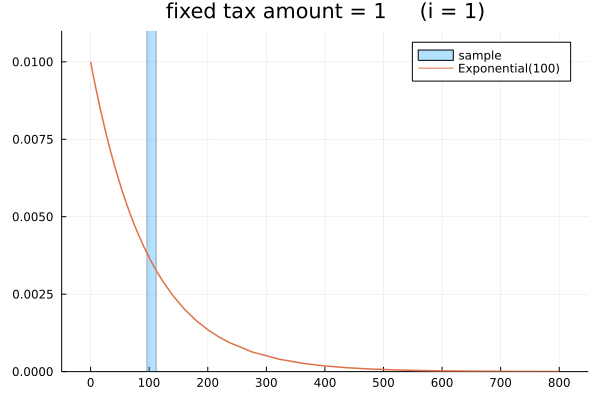

In [1]:
using Plots
using Distributions

function update!(X, nskips, tmp)
    for k in 1:nskips
        i, j = sample!(1:length(X), tmp)
        if X[i] ≥ 1
            X[i] -= 1
            X[j] += 1
        end
    end
    X
end

function random_walk_on_simplex(init; nskips=10^6, niters=200)
    Sample = Vector{typeof(init)}(undef, niters + 1)
    Sample[1] = copy(init)
    tmp = [0, 0]
    for i in 1:niters
        X = copy(Sample[i])
        update!(X, nskips, tmp)
        Sample[i+1] = X
    end
    Sample
end

a = 10^2
n = 10^4
init = fill(a, n)
@time Sample = random_walk_on_simplex(init)

bin = range(0, 8a; length=51)
@gif for i in [fill(1, 20); 1:length(Sample)]
    X = Sample[i]
    histogram(X; alpha=0.3, norm=true, bin, label="sample")
    plot!(x -> pdf(Exponential(a), x), 0, 8a; label="Exponential($a)", lw=1.5)
    plot!(; xtick=0:a:8a, ylim=(0, 1.1/a))
    title!("fixed tax amount = 1     (i = $i)")
end

  0.091838 seconds (98.68 k allocations: 21.760 MiB, 31.74% compilation time)


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0020\tmp.gif
└ @ Plots D:\.julia\packages\Plots\Di0Qb\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0020\\tmp.gif")
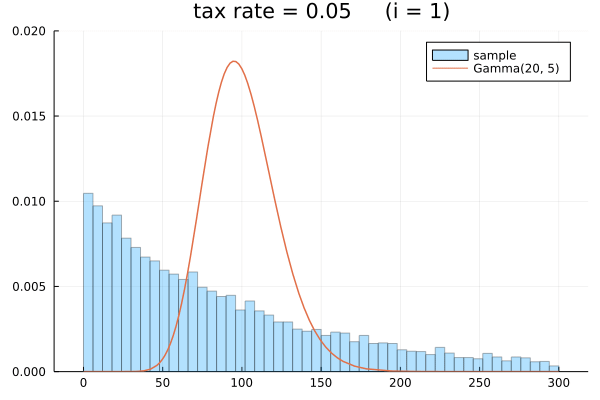

In [2]:
using Plots
using Distributions

function update!(X, rate, nskips, tmp)
    for k in 1:nskips
        i, j = sample!(1:length(X), tmp)
        a = rate * X[i]
        X[i] -= a
        X[j] += a
    end
    X
end

function random_walk_on_simplex(init, rate; nskips=10^4, niters=200)
    Sample = Vector{typeof(init)}(undef, niters + 1)
    Sample[1] = copy(init)
    tmp = [0, 0]
    for i in 1:niters
        X = copy(Sample[i])
        update!(X, rate, nskips, tmp)
        Sample[i+1] = X
    end
    Sample
end

a = 1e2
n = 10^4
rate = 0.05
init = rand(Exponential(a), n)
@time Sample = random_walk_on_simplex(init, rate)

bin = range(0, 3a; length=51)
@gif for i in [fill(1, 20); 1:length(Sample)]
    X = Sample[i]
    histogram(X; alpha=0.3, norm=true, bin, label="sample")
    plot!(x -> pdf(Gamma(20, 5), x), 0, 3a; label="Gamma(20, 5)", lw=1.5)
    plot!(; xtick=0:a/2:3a, ylim=(0, 2/a))
    title!("tax rate = $rate     (i = $i)")
end

  0.015857 seconds (6.14 k allocations: 15.736 MiB, 33.70% compilation time)


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0020\tmp.gif
└ @ Plots D:\.julia\packages\Plots\Di0Qb\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0020\\tmp.gif")
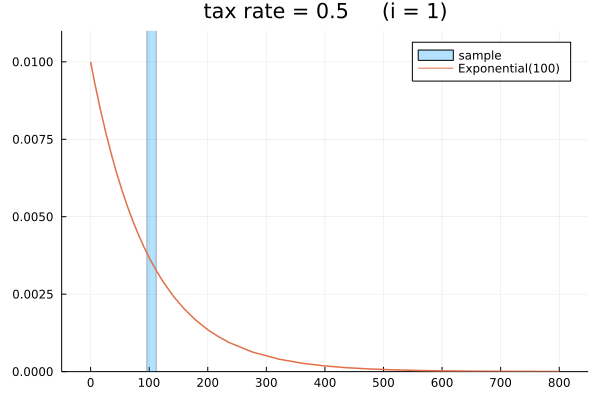

In [3]:
a = 1e2
n = 10^4
rate = 0.5
init = fill(a, n)
@time Sample = random_walk_on_simplex(init, rate; nskips=10^3)

bin = range(0, 8a; length=51)
@gif for i in [fill(1, 20); 1:length(Sample)]
    X = Sample[i]
    histogram(X; alpha=0.3, norm=true, bin, label="sample")
    plot!(x -> pdf(Exponential(100), x), 0, 8a; label="Exponential(100)", lw=1.5)
    plot!(; xtick=0:a:8a, ylim=(0, 1.1/a))
    title!("tax rate = $rate     (i = $i)")
end

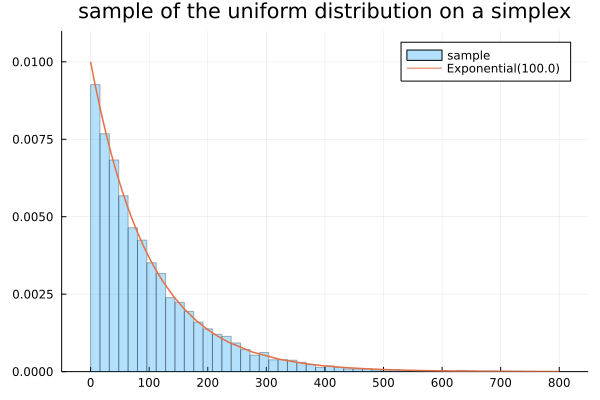

In [4]:
using Plots
using Distributions
using Random

function uniform_rand_on_simplex!(X, a = 100.0)
    S = a*length(X)
    Y = @view X[begin:end-1]
    rand!(Uniform(0, S), Y)
    sort!(Y)
    for i in lastindex(X):-1:firstindex(X)+1
        @inbounds X[i] -= X[i-1]
    end
    X
end

uniform_rand_on_simplex(n, a = 100.0) = uniform_rand_on_simplex!(Vector{Float64}(undef, n), a)

a = 1e2
n = 10^4
X = uniform_rand_on_simplex(n, a)
bin = range(0, 8a; length=51)
histogram(X; alpha=0.3, norm=true, bin, label="sample")
plot!(x -> pdf(Exponential(a), x), 0, 8a; label="Exponential($a)", lw=1.5)
plot!(; xtick=0:a:8a, ylim=(0, 1.1/a))
title!("sample of the uniform distribution on a simplex")

  0.651654 seconds (88.65 k allocations: 21.042 MiB, 5.34% compilation time)
count(Sample[end] .≥ 100) / length(Sample[end]) = 0.3701


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0020\tmp.gif
└ @ Plots D:\.julia\packages\Plots\Di0Qb\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0020\\tmp.gif")
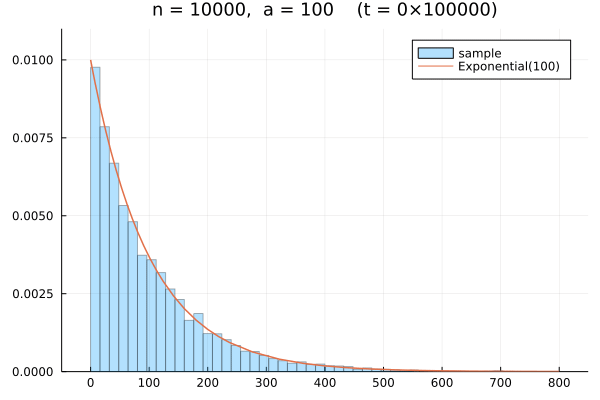

In [5]:
a = 10^2
n = 10^4
init = uniform_rand_on_simplex(n, a)
nskips = 10^5
niters = 200
@time Sample = random_walk_on_simplex(init; nskips, niters)

@show count(Sample[end] .≥ 100)/length(Sample[end])

bin = range(0, 8a; length=51)
@gif for i in [fill(1, 20); 1:lastindex(Sample); fill(lastindex(Sample), 20)]
    X = Sample[i]
    histogram(X; alpha=0.3, norm=true, bin, label="sample")
    plot!(x -> pdf(Exponential(a), x), 0, 8a; label="Exponential($a)", lw=1.5)
    plot!(; xtick=0:a:8a, ylim=(0, 1.1/a))
    title!("n = $n,  a = $a    (t = $(i-1)×$(nskips))", titlefontsize=12)
end

count((Sample[end])[poor] .≥ 100) / length(poor) = 0.07277486910994764


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0020\tmp.gif
└ @ Plots D:\.julia\packages\Plots\Di0Qb\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0020\\tmp.gif")
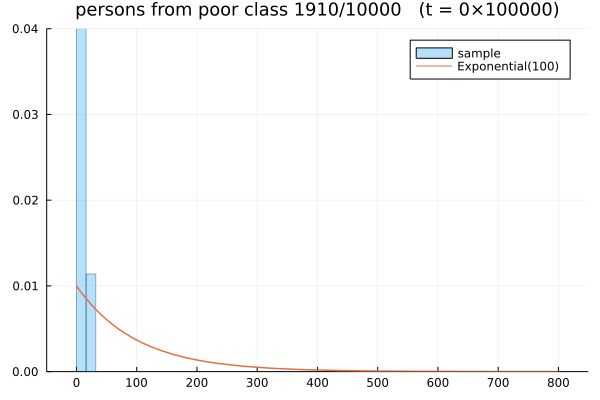

In [6]:
poor = findall(Sample[1] .≤ 20)
@show count(Sample[end][poor] .≥ 100)/length(poor)

bin = range(0, 8a; length=51)
@gif for i in [fill(1, 20); 1:lastindex(Sample); fill(lastindex(Sample), 20)]
    X = Sample[i]
    histogram(X[poor]; alpha=0.3, norm=true, bin, label="sample")
    plot!(x -> pdf(Exponential(a), x), 0, 8a; label="Exponential($a)", lw=1.5)
    plot!(; xtick=0:a:8a, ylim=(0, 4/a))
    title!("persons from poor class $(length(poor))/$(n)   (t = $(i-1)×$(nskips))",
        titlefontsize=12)
end

count((Sample[end])[rich] .≤ 100) / length(rich) = 0.030347890451517395


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0020\tmp.gif
└ @ Plots D:\.julia\packages\Plots\Di0Qb\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0020\\tmp.gif")
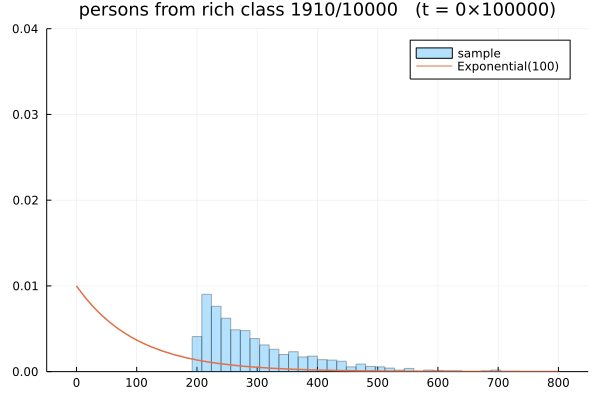

In [7]:
rich = findall(Sample[1] .≥ 200)
@show count(Sample[end][rich] .≤ 100)/length(rich)

bin = range(0, 8a; length=51)
@gif for i in [fill(1, 20); 1:lastindex(Sample); fill(lastindex(Sample), 20)]
    X = Sample[i]
    histogram(X[rich]; alpha=0.3, norm=true, bin, label="sample")
    plot!(x -> pdf(Exponential(a), x), 0, 8a; label="Exponential($a)", lw=1.5)
    plot!(; xtick=0:a:8a, ylim=(0, 4/a))
    title!("persons from rich class $(length(poor))/$(n)   (t = $(i-1)×$(nskips))",
        titlefontsize=12)
end